Table of contents:

|No.|Topic|
|:------|:------|
|1.|[Idea 1](#section_id1)|
|2.|[Idea 2](#section_id2)|
|3.|[Original Idea](#section_id3)|

Import libraries for:
* pandas
* numpy
* scipy
* statsmodels
* sikit

In [80]:
import pandas as pd
import numpy as np
import scipy.stats as stats

# for regressions with statsmodels:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# for regressions with scikit-learn:
import sklearn.linear_model as sklm
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [81]:
# pip already installed
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

Set standards for data visualizations

In [82]:
# visualization and tuning the aesthetics
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})
plt.style.use('seaborn-whitegrid')
plt.rc('text', usetex = False)
plt.rc('font', family = 'serif')
plt.rc('xtick', labelsize = 10) 
plt.rc('ytick', labelsize = 10) 
plt.rc('font', size = 12) 
plt.rc('figure', figsize = (6, 5))

<a id='section_id1'></a>
# Idea 1

Get data from world values data set

In [83]:
pd.set_option("display.max_columns", None)
wv = pd.read_csv("worldvalues-data.csv", dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])
wv.shape

(89565, 440)

In [84]:
wv[15:25]

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V44_ES,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V56_NZ,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V74B,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125_00,V125_01,V125_02,V125_03,V125_04,V125_05,V125_06,V125_07,V125_08,V125_09,V125_10,V125_11,V125_12,V125_13,V125_14,V125_15,V125_16,V125_17,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V160A,V160B,V160C,V160D,V160E,V160F,V160G,V160H,V160I,V160J,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V203A,V204,V205,V206,V207,V207A,V208,V209,V210,V211,V212,V213,V214,V215_01,V215_02,V215_03,V215_04,V215_05,V215_06,V215_07,V215_08,V215_10,V215_11,V215_12,V215_13,V215_14,V215_15,V215_16,V215_17,V215_18,V216,V217,V218,V219,V220,V221,V222,V223,V224,V218_ESMA,V217_ESMA,V219_ESMA,V220_ESMA,V221_ESMA,V222_ESMA,V223_ESMA,V224_ESMA,V225,V226,V227,V228,V228_2,V228A,V228B,V228C,V228D,V228E,V228F,V228G,V228H,V228I,V228J,V228K,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V243_AU,V244,V244_AU,V245,V246,V247,V248,V248_CS,V249,V250,V251,V252,V253,V253_CS,V254,V255,V256,V256B,V256C,V257,V258,V258A,V260,V261,V262,V265,Y001,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5,Y002,Y003,MN_35A,MN_163A,MN_163B,MN_163C,MN_228L,MN_228M,MN_228N,MN_228O,MN_228P,MN_228Q,MN_228R,MN_228S1,MN_228S2,MN_228S3,MN_228S4,MN_228S5,MN_228S6,MN_228S7,MN_228S8,MN_229A,MN_229B,MN_230A,MN_233A,MN_233B,MN_234A,MN_237A,MN_237B1,MN_237B2,MN_237B3,MN_237B4,MN_237B5,MN_237B6,MN_237B7,MN_237C1,MN_237C2,MN_237C3,MN_237C4,MN_237C5,MN_237C6,MN_249A1,MN_249A2,MN_249A3,SACSECVAL,SECVALWGT,RESEMAVAL,WEIGHTB,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,WEIGHT1A,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,WEIGHT2A,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,WEIGHT3A,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,WEIGHT4A,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,WEIGHT1B,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,WEIGHT2B,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW
15,2010-2013,Algeria,Algeria,16,1,2,2,3,3,4,2,3,1,2,2,2,2,1,2,2,1,1,2,3,2,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,2,2,1,1,2,Not asked,1,Not asked,1,1,2,3,2,2,3,3,7,5,Not asked in survey,Married,1 child,6,2,4,2,3,4,3,1,2,2,2,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,A little like me,Poor sanitation and infectious diseases,1,1,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,5,6,7,4,6,2,4,1,1,2,3,3,3,1,2,2,2,3,4,2,2,2,3,1,2,2,3,4,2,2,Not asked in survey,Not asked in survey,Not asked in survey,3,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,0,0,3,2,3,2,2,7,3,3,5,4,7,6,5,5,4,6,3,2,Muslim,Once a week,Once a day,1,1,1,2,1,10,1,1,1,1,3,5,4,3,2,2,2,5,2,3,2,3,3,Disagree strongly,Disagree a little,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree a little,Disagree strongly,Disagree a little,Neither agree nor disagree,Disagree a little,1,2,3,3,3,4,1,5,5,1,1,2,3,2,4,3,3,2,4,4,4,4,4,6,7,2,4,8,8,5,Never justifiable,Never justifiable,Never justifiable,Never justifiable,NaN,Never justifiable,3,NaN,Never justifiable,Never ju

Reduce data down to the columns relevant for study
* V55 - Freedom of choice and control over life (Dependent variable)
* V58 - Number of children
* V145 - Frequency of religious attendece
* V229 - Employment status
* V246 - Citizenship

In [86]:
wv = wv[["V55", "V58", "V95", "V145", "V229", "V246"]]
wv[15:55]

,V55,V58,V95,V145,V229,V246
15,7,1 child,5,Once a week,Full time,1
16,7,1 child,5,Once a week,Full time,1
17,7,2 children,5,Once a week,Housewife,1
18,7,No children,7,Once a week,Full time,1
19,7,3 children,6,Once a week,Housewife,1
20,5,No children,NaN,7,Students,1
21,No choice at all,No children,NaN,7,Unemployed,1
22,5,No children,NaN,7,Students,1
23,No choice at all,No children,NaN,7,Unemployed,1
24,5,No children,NaN,7,Full time,1


In [87]:
wv.describe()

,V55,V58,V95,V145,V229,V246
count,88117,87898,68199,84720,88038,89558
unique,10,9,10,7,8,5
top,8,No children,5,7,Full time,1
freq,16646,26142,19838,20631,28036,79300


In [88]:
wv.dtypes

V55     object
V58     object
V95     object
V145    object
V229    object
V246    object
dtype: object

Replace non answers

In [89]:
wv.replace(['Missing', 'Unknown', 'Not asked', 'Not asked in suvey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
wv.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR', 'HT: Dropped out survey; RU: Inappropriate response{Inappropriate}', 'Not asked in survey', 'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}'], np.nan, inplace=True)
wv[15:25]

,V55,V58,V95,V145,V229,V246
15,7,1 child,5,Once a week,Full time,1
16,7,1 child,5,Once a week,Full time,1
17,7,2 children,5,Once a week,Housewife,1
18,7,No children,7,Once a week,Full time,1
19,7,3 children,6,Once a week,Housewife,1
20,5,No children,NaN,7,Students,1
21,No choice at all,No children,NaN,7,Unemployed,1
22,5,No children,NaN,7,Students,1
23,No choice at all,No children,NaN,7,Unemployed,1
24,5,No children,NaN,7,Full time,1


Replace the strings in variables that are supposed to be numerical

In [90]:
wv.replace({"V55":{"No choice at all" : 1, "A great deal of choice" : 10}}, inplace=True)
wv.replace({"V58":{"No children" : 0, "1 child" : 1, "2 children" : 2, "3 children" : 3, "4 children" : 4, "5 children" : 5, "6 children" : 6, "7 children" : 7, "8 or more children" : 8}}, inplace=True)
wv.replace({"V95":{"Left" : 1, "Right" : 10}}, inplace=True)
wv.replace({"V145":{"More than once a week" : 1, "Once a week" : 2, "Once a month" : 3, "Only on special holy days" : 4, "Once a year" : 5, "Less often" : 6, "Never, practically never" : 7}}, inplace=True)
wv.replace({"V229":{"Full time" : 1, "Part time" : 2, "Self employed" : 3, "Retired" : 4, "Housewife" : 5, "Students" : 6, "Unemployed" : 7, "Other" : 8}}, inplace=True)
wv[15:25]

,V55,V58,V95,V145,V229,V246
15,7,1,5,2,1,1
16,7,1,5,2,1,1
17,7,2,5,2,5,1
18,7,0,7,2,1,1
19,7,3,6,2,5,1
20,5,0,NaN,7,6,1
21,1,0,NaN,7,7,1
22,5,0,NaN,7,6,1
23,1,0,NaN,7,7,1
24,5,0,NaN,7,1,1


In [91]:
wv.describe()

,V55,V58,V95,V145,V229,V246
count,88117,87898,68199,84720,88038,80429
unique,10,9,10,7,8,2
top,8,0,5,7,1,1
freq,16646,26142,19838,20631,28036,79300


In [92]:
wv = wv.apply(pd.to_numeric)

In [93]:
wv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89565 entries, 0 to 89564
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V55     88117 non-null  float64
 1   V58     87898 non-null  float64
 2   V95     68199 non-null  float64
 3   V145    84720 non-null  float64
 4   V229    88038 non-null  float64
 5   V246    80429 non-null  float64
dtypes: float64(6)
memory usage: 4.1 MB


In [94]:
wv.describe()

,V55,V58,V95,V145,V229,V246
count,88117.000000,87898.000000,68199.000000,84720.000000,88038.000000,80429.000000
mean,7.071337,1.858017,5.654482,4.107731,3.400668,1.014037
std,2.251519,1.789133,2.358175,2.189000,2.149471,0.117645
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,0.000000,5.000000,2.000000,1.000000,1.000000
50%,7.000000,2.000000,5.000000,4.000000,3.000000,1.000000
75%,9.000000,3.000000,7.000000,6.000000,5.000000,1.000000
max,10.000000,8.000000,10.000000,7.000000,8.000000,2.000000


Give columns meaningful titles

In [95]:
wv = wv.rename(columns = {"V55" : "Freedom/Control", "V58" : "Number of Children", "V95" : "Political Scale", "V145" : "Religious Attendance", "V229" : "Employment status", "V246" : "Citizenship"})
wv.head()

,Freedom/Control,Number of Children,Political Scale,Religious Attendance,Employment status,Citizenship
0,7.0,0.0,5.0,3.0,6.0,1.0
1,6.0,0.0,5.0,2.0,6.0,1.0
2,6.0,0.0,6.0,2.0,3.0,1.0
3,6.0,0.0,6.0,2.0,1.0,1.0
4,6.0,3.0,5.0,1.0,3.0,1.0


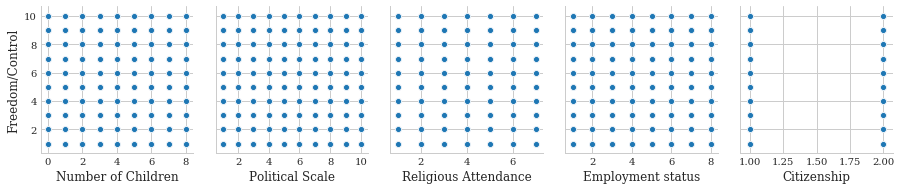

In [96]:
sns.pairplot(data=wv, y_vars=['Freedom/Control'], x_vars=['Number of Children', 'Political Scale', 'Religious Attendance', 'Employment status', 'Citizenship'])

In [97]:
wv.isna().sum()

Freedom/Control          1448
Number of Children       1667
Political Scale         21366
Religious Attendance     4845
Employment status        1527
Citizenship              9136
dtype: int64

In [98]:
wv.shape

(89565, 6)

In [99]:
wv.dropna(inplace=True)

In [100]:
wv.shape

(60981, 6)

In [101]:
wv.isna().sum()

Freedom/Control         0
Number of Children      0
Political Scale         0
Religious Attendance    0
Employment status       0
Citizenship             0
dtype: int64

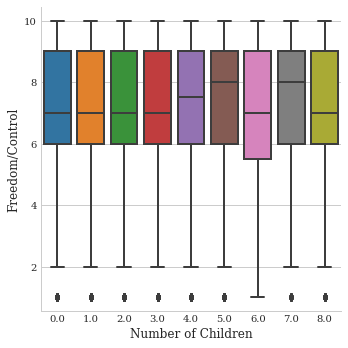

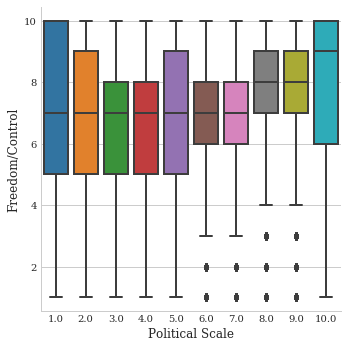

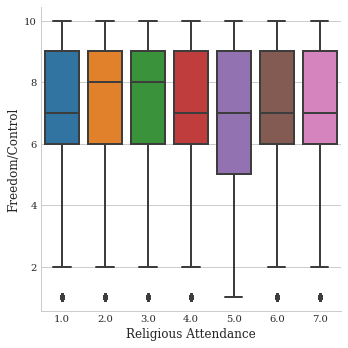

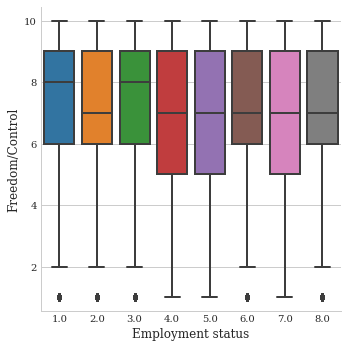

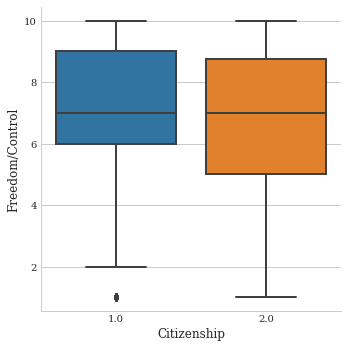

In [102]:
sns.catplot(x="Number of Children", y="Freedom/Control", data=wv, kind="box")
sns.catplot(x="Political Scale", y="Freedom/Control", data=wv, kind="box")
sns.catplot(x="Religious Attendance", y="Freedom/Control", data=wv, kind="box")
sns.catplot(x="Employment status", y="Freedom/Control", data=wv, kind="box")
sns.catplot(x="Citizenship", y="Freedom/Control", data=wv, kind="box")

In [103]:
wv.corr()

,Freedom/Control,Number of Children,Political Scale,Religious Attendance,Employment status,Citizenship
Freedom/Control,1.000000,0.012033,0.129813,-0.028194,-0.079685,-0.014762
Number of Children,0.012033,1.000000,0.081514,-0.106547,0.002992,-0.007951
Political Scale,0.129813,0.081514,1.000000,-0.106098,0.005354,-0.020422
Religious Attendance,-0.028194,-0.106547,-0.106098,1.000000,-0.067711,0.025131
Employment status,-0.079685,0.002992,0.005354,-0.067711,1.000000,-0.014217
Citizenship,-0.014762,-0.007951,-0.020422,0.025131,-0.014217,1.000000


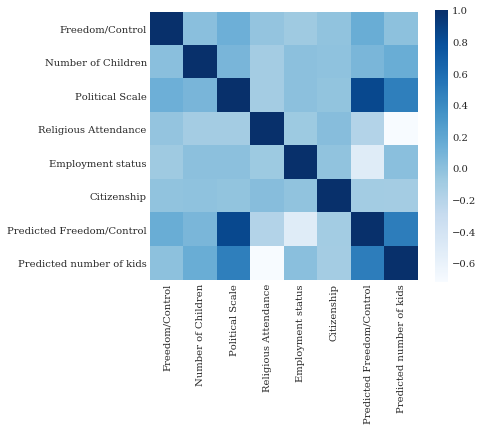

In [189]:
corrmat = wv.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

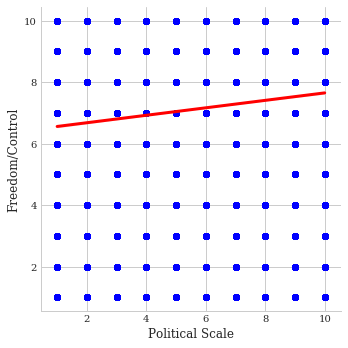

In [105]:
sns.lmplot(x="Political Scale", y="Freedom/Control", data=wv, order=1, ci=95, scatter_kws={'color':'b'}, line_kws={'color':'r'})

In [187]:
y = wv["Freedom/Control"]
X = wv[["Number of Children", "Political Scale", "Religious Attendance", "Employment status", "Citizenship"]]
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Freedom/Control   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     298.3
Date:                Mon, 06 Jul 2020   Prob (F-statistic):          1.61e-316
Time:                        15:40:51   Log-Likelihood:            -1.3471e+05
No. Observations:               60981   AIC:                         2.694e+05
Df Residuals:                   60975   BIC:                         2.695e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.0650      0.085     83.549      0.000       6.899       7.231
Number of Children      -0.0005      0.005     -0.091      0.927      -0.011       0.010
Political Scale          0.1195      0.004     31.703      0.000       0.112       0.127
Religious Attendance    -0.0205      0.004     -4.905      0.000      -0.029      -0.012
Employment status       -0.0848      0.004    -20.420      0.000      -0.093      -0.077
Citizenship             -0.2427      0.076     -3.202      0.001      -0.391      -0.094
==============================================================================
Omnibus:                     3471.246   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4097.978
Skew:                          -0.633   Prob(JB):                         0.00
Kurtosis:                       3.101   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
predictions1 = results1.predict(X)
predictions1.head()

0    6.849678
1    6.870158
2    7.243991
3    7.413550
4    7.143545
dtype: float64

In [108]:
wv["Predicted Freedom/Control"]=predictions1

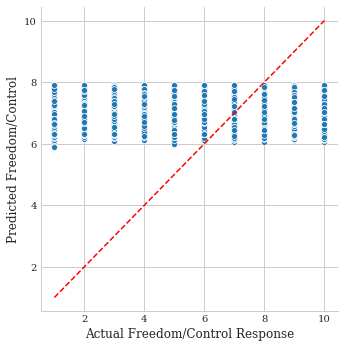

In [109]:
g=sns.relplot(x="Freedom/Control", y="Predicted Freedom/Control", data=wv) #store the plot in "g"
g.set(xlabel="Actual Freedom/Control Response", ylabel="Predicted Freedom/Control") #set lables for axes
mn = min(wv["Freedom/Control"].min(), wv["Predicted Freedom/Control"].min()) #generate min coordinates for line
mx = max(wv["Freedom/Control"].max(), wv["Predicted Freedom/Control"].max()) #generate max coordinates for line
points = np.linspace(mn, mx, 100) #generate points of the line
plt.plot(points, points, color='r', linestyle='--', linewidth=1.5) #add the line to the plot
plt.show() #show the full plot

In [110]:
sm.tools.eval_measures.rmse(wv["Freedom/Control"], wv["Predicted Freedom/Control"], axis=0)

2.2036957921928892

In [111]:
np.sqrt(np.square(wv["Freedom/Control"]-wv["Predicted Freedom/Control"]).mean()) 

2.203695792192889

In [112]:
regressionSummary(wv["Freedom/Control"], wv["Predicted Freedom/Control"])


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 2.2037
            Mean Absolute Error (MAE) : 1.7650
          Mean Percentage Error (MPE) : -24.7312
Mean Absolute Percentage Error (MAPE) : 43.7377


<a id='section_id2'></a>

# Idea 2

At this point it does not appear we have a good set of findings. Therefore I am switching my thesis to now attempt to predict a the number a children a person has based on the following responses:
* V58 # children - NEW Dependent variable
* V95 political scale
* V145 religious attendance
* v229 employment status
* v246 citizen
* V238 social class
* V253 size of town

In [123]:
wv2 = pd.read_csv("worldvalues-data.csv", dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])
wv2.shape

(89565, 440)

In [124]:
wv2 = wv2[["V58", "V95", "V145", "V229", "V246", "V238", "V253"]]
wv2[15:55]

,V58,V95,V145,V229,V246,V238,V253
15,1 child,5,Once a week,Full time,1,Lower middle class,"Under 2,000"
16,1 child,5,Once a week,Full time,1,Lower middle class,"Under 2,000"
17,2 children,5,Once a week,Housewife,1,Lower middle class,"Under 2,000"
18,No children,7,Once a week,Full time,1,Lower middle class,"Under 2,000"
19,3 children,6,Once a week,Housewife,1,Lower middle class,"Under 2,000"
20,No children,NaN,7,Students,1,Upper middle class,"Under 2,000"
21,No children,NaN,7,Unemployed,1,Lower class,"Under 2,000"
22,No children,NaN,7,Students,1,Lower class,"Under 2,000"
23,No children,NaN,7,Unemployed,1,Lower middle class,"Under 2,000"
24,No children,NaN,7,Full time,1,Working class,"Under 2,000"


In [125]:
wv2.replace(['Missing', 'Unknown', 'Not asked', 'Not asked in suvey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
wv2.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR', 'HT: Dropped out survey; RU: Inappropriate response{Inappropriate}', 'Not asked in survey', 'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}'], np.nan, inplace=True)
wv2[15:25]

,V58,V95,V145,V229,V246,V238,V253
15,1 child,5,Once a week,Full time,1,Lower middle class,"Under 2,000"
16,1 child,5,Once a week,Full time,1,Lower middle class,"Under 2,000"
17,2 children,5,Once a week,Housewife,1,Lower middle class,"Under 2,000"
18,No children,7,Once a week,Full time,1,Lower middle class,"Under 2,000"
19,3 children,6,Once a week,Housewife,1,Lower middle class,"Under 2,000"
20,No children,NaN,7,Students,1,Upper middle class,"Under 2,000"
21,No children,NaN,7,Unemployed,1,Lower class,"Under 2,000"
22,No children,NaN,7,Students,1,Lower class,"Under 2,000"
23,No children,NaN,7,Unemployed,1,Lower middle class,"Under 2,000"
24,No children,NaN,7,Full time,1,Working class,"Under 2,000"


In [126]:
wv2.replace({"V55":{"No choice at all" : 1, "A great deal of choice" : 10}}, inplace=True)
wv2.replace({"V58":{"No children" : 0, "1 child" : 1, "2 children" : 2, "3 children" : 3, "4 children" : 4, "5 children" : 5, "6 children" : 6, "7 children" : 7, "8 or more children" : 8}}, inplace=True)
wv2.replace({"V95":{"Left" : 1, "Right" : 10}}, inplace=True)
wv2.replace({"V145":{"More than once a week" : 1, "Once a week" : 2, "Once a month" : 3, "Only on special holy days" : 4, "Once a year" : 5, "Less often" : 6, "Never, practically never" : 7}}, inplace=True)
wv2.replace({"V229":{"Full time" : 1, "Part time" : 2, "Self employed" : 3, "Retired" : 4, "Housewife" : 5, "Students" : 6, "Unemployed" : 7, "Other" : 8}}, inplace=True)
wv2.replace({"V238":{"Upper class" : 1, "Upper middle class" : 2, "Lower middle class" : 3, "Working class" : 4, "Lower class" : 5}}, inplace=True)
wv2.replace({"V253":{"Under 2,000" : 1, "2,000-5,000" : 2, "5,000-10,000" : 3, "10,000-20,000" : 4, "20,000-50,000" : 5, "50,000-100,000" : 6, "100,000-500,000" : 7, "500,000 and more" : 8}}, inplace=True)
wv2[185:200]

,V58,V95,V145,V229,V246,V238,V253
185,2,10,7,1,1,3.0,1
186,5,NaN,1,5,1,3.0,1
187,2,6,7,1,1,2.0,1
188,5,NaN,7,2,1,4.0,1
189,5,NaN,7,4,1,3.0,1
190,0,5,1,6,1,2.0,3
191,0,5,1,6,1,2.0,3
192,0,NaN,2,6,1,4.0,3
193,0,NaN,1,6,1,2.0,3
194,0,NaN,2,6,1,2.0,3


In [127]:
wv2 = wv2.apply(pd.to_numeric)
wv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89565 entries, 0 to 89564
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V58     87898 non-null  float64
 1   V95     68199 non-null  float64
 2   V145    84720 non-null  float64
 3   V229    88038 non-null  float64
 4   V246    80429 non-null  float64
 5   V238    86883 non-null  float64
 6   V253    68803 non-null  float64
dtypes: float64(7)
memory usage: 4.8 MB


In [128]:
wv2.describe()

,V58,V95,V145,V229,V246,V238,V253
count,87898.000000,68199.000000,84720.000000,88038.000000,80429.000000,86883.000000,68803.000000
mean,1.858017,5.654482,4.107731,3.400668,1.014037,3.313939,4.544511
std,1.789133,2.358175,2.189000,2.149471,0.117645,0.998554,2.565143
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,5.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,2.000000,5.000000,4.000000,3.000000,1.000000,3.000000,5.000000
75%,3.000000,7.000000,6.000000,5.000000,1.000000,4.000000,7.000000
max,8.000000,10.000000,7.000000,8.000000,2.000000,5.000000,8.000000


In [130]:
wv2.isna().sum()

V58      1667
V95     21366
V145     4845
V229     1527
V246     9136
V238     2682
V253    20762
dtype: int64

In [132]:
wv2.dropna(inplace=True)
wv2.shape

(50593, 7)

In [133]:
wv2.isna().sum()

V58     0
V95     0
V145    0
V229    0
V246    0
V238    0
V253    0
dtype: int64

In [138]:
wv2 = wv2.rename(columns = {"V58" : "Number of kids", "V95" : "Political Scale", "V145" : "Religious Attendance", "V229" : "Employment status", "V246" : "Citizenship", "V238" : "Social Class", "V253" : "Size of town"})
wv2.head()

,Number of kids,Political Scale,Religious Attendance,Employment status,Citizenship,Social Class,Size of town
0,0.0,5.0,3.0,6.0,1.0,4.0,1.0
1,0.0,5.0,2.0,6.0,1.0,3.0,1.0
2,0.0,6.0,2.0,3.0,1.0,4.0,1.0
3,0.0,6.0,2.0,1.0,1.0,4.0,1.0
4,3.0,5.0,1.0,3.0,1.0,3.0,1.0


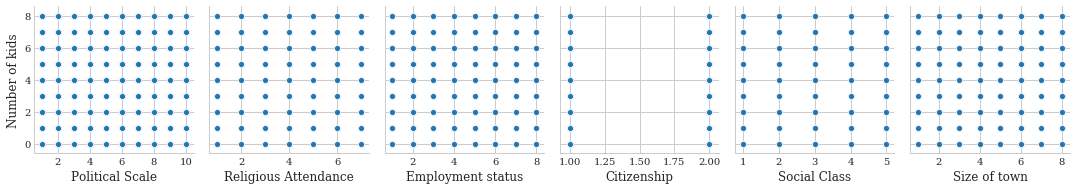

In [140]:
sns.pairplotvdata=wv2, y_vars=['Number of kids'], x_vars=['Political Scale', 'Religious Attendance', 'Employment status', 'Citizenship', 'Social Class', 'Size of town'])

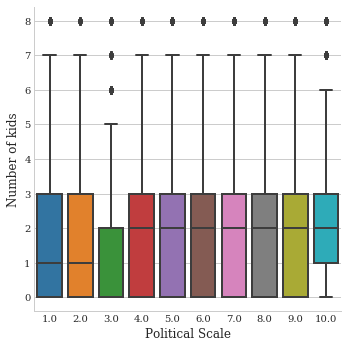

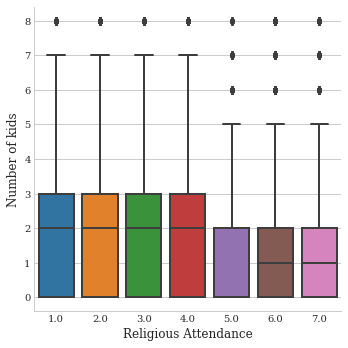

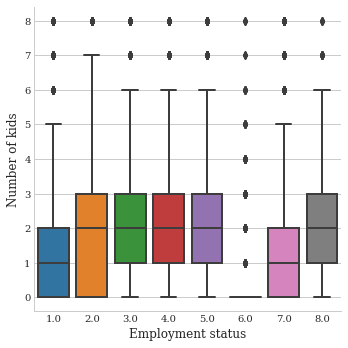

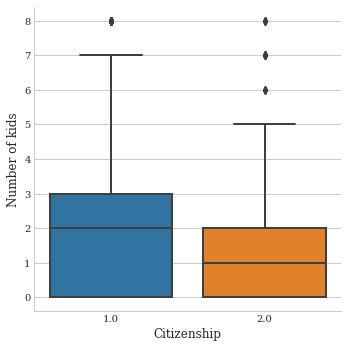

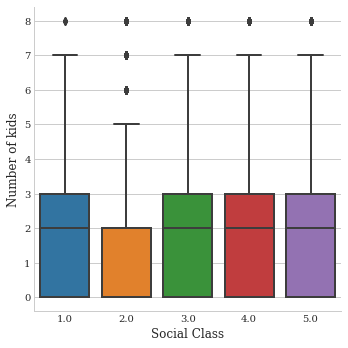

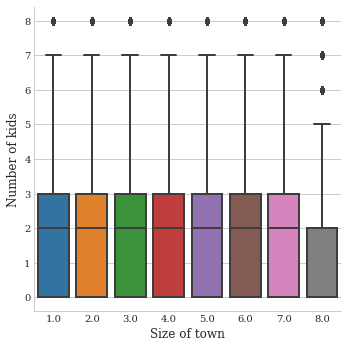

In [141]:
sns.catplot(x="Political Scale", y="Number of kids", data=wv2, kind="box")
sns.catplot(x="Religious Attendance", y="Number of kids", data=wv2, kind="box")
sns.catplot(x="Employment status", y="Number of kids", data=wv2, kind="box")
sns.catplot(x="Citizenship", y="Number of kids", data=wv2, kind="box")
sns.catplot(x="Social Class", y="Number of kids", data=wv2, kind="box")
sns.catplot(x="Size of town", y="Number of kids", data=wv2, kind="box")

In [142]:
wv2.corr()

,Number of kids,Political Scale,Religious Attendance,Employment status,Citizenship,Social Class,Size of town
Number of kids,1.000000,0.073001,-0.108666,0.001415,-0.015651,0.076771,-0.051671
Political Scale,0.073001,1.000000,-0.094810,0.002964,-0.023761,-0.071486,-0.050731
Religious Attendance,-0.108666,-0.094810,1.000000,-0.093550,0.033436,-0.069198,0.077265
Employment status,0.001415,0.002964,-0.093550,1.000000,-0.016784,0.156525,-0.115379
Citizenship,-0.015651,-0.023761,0.033436,-0.016784,1.000000,0.004347,0.039789
Social Class,0.076771,-0.071486,-0.069198,0.156525,0.004347,1.000000,-0.129188
Size of town,-0.051671,-0.050731,0.077265,-0.115379,0.039789,-0.129188,1.000000


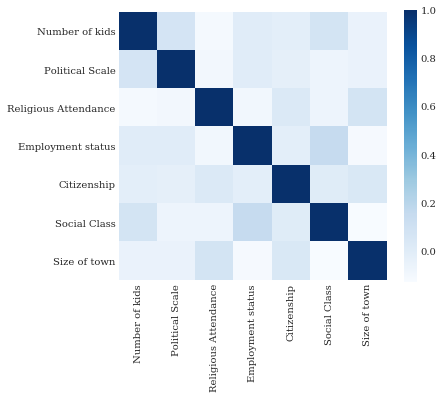

In [144]:
corrmat = wv2.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")

In [147]:
y = wv2["Number of kids"]
X = wv2[["Political Scale", "Religious Attendance", "Employment status", "Citizenship", "Social Class", "Size of town"]]
X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Number of kids   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     198.0
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.50e-250
Time:                        15:09:39   Log-Likelihood:                -98674.
No. Observations:               50593   AIC:                         1.974e+05
Df Residuals:                   50586   BIC:                         1.974e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    1.7425      0.077     22.510      0.000       1.591       1.894
Political Scale          0.0484      0.003     15.172      0.000       0.042       0.055
Religious Attendance    -0.0768      0.004    -21.657      0.000      -0.084      -0.070
Employment status       -0.0187      0.004     -5.234      0.000      -0.026      -0.012
Citizenship             -0.1506      0.065     -2.320      0.020      -0.278      -0.023
Social Class             0.1252      0.008     16.511      0.000       0.110       0.140
Size of town            -0.0228      0.003     -7.495      0.000      -0.029      -0.017
==============================================================================
Omnibus:                     7722.199   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12520.381
Skew:                           1.046   Prob(JB):                         0.00
Kurtosis:                       4.251   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
predictions1 = results1.predict(X)
predictions1.head()

0    1.969657
1    1.921270
2    2.150870
3    2.188177
4    2.054056
dtype: float64

In [153]:
wv2["Predicted number of kids"]=predictions1

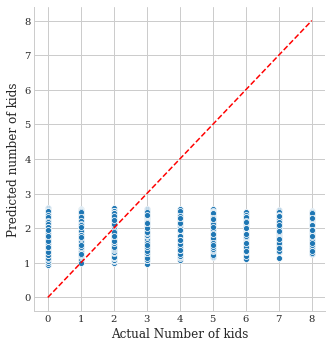

In [155]:
g=sns.relplot(x="Number of kids", y="Predicted number of kids", data=wv2) #store the plot in "g"
g.set(xlabel="Actual Number of kids", ylabel="Predicted number of kids") #set lables for axes
mn = min(wv2["Number of kids"].min(), wv2["Predicted number of kids"].min()) #generate min coordinates for line
mx = max(wv2["Number of kids"].max(), wv2["Predicted number of kids"].max()) #generate max coordinates for line
points = np.linspace(mn, mx, 100) #generate points of the line
plt.plot(points, points, color='r', linestyle='--', linewidth=1.5) #add the line to the plot
plt.show() #show the full plot

In [156]:
sm.tools.eval_measures.rmse(wv2["Number of kids"], wv2["Predicted number of kids"], axis=0)

1.7013307844873207

In [158]:
regressionSummary(wv2["Number of kids"], wv2["Predicted number of kids"])


Regression statistics

               Mean Error (ME) : 0.0000
Root Mean Squared Error (RMSE) : 1.7013
     Mean Absolute Error (MAE) : 1.3286


<a id='section_id3'></a>

# Original Idea

In [160]:
pd.set_option("display.max_columns", None)
wv3 = pd.read_csv("worldvalues-data.csv", dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])
wv3.shape

(89565, 440)

In [161]:
wb_incomes = pd.read_csv("worldbank_incomegroups.csv")
wb_incomes.shape

(218, 2)

In [162]:
# replace world bank country labels with those matching the world values dictionary
wb_incomes.replace({"Taiwan, China" : "Taiwan", "Hong Kong SAR, China" : "Hong Kong", "Egypt, Arab Rep." : "Egypt", "Korea, Rep." : "South Korea", "Kyrgyz Republic" : "Kyrgstan", "Russian Federation": "Russia", "Yemen, Rep." : "Yemen"}, inplace=True)
pd.set_option('display.max_rows', 500)
wb_incomes

,country,income_group
0,Afghanistan,Low
1,Benin,Low
2,Burkina Faso,Low
3,Burundi,Low
4,Central African Republic,Low
5,Chad,Low
6,"Congo, Dem. Rep",Low
7,Eritrea,Low
8,Ethiopia,Low
9,"Gambia, The",Low


In [164]:
wv_incomes = pd.merge(wv3, wb_incomes, left_on ="V2", right_on = "country", how="left")
wv_incomes

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V44_ES,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V56_NZ,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V74B,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125_00,V125_01,V125_02,V125_03,V125_04,V125_05,V125_06,V125_07,V125_08,V125_09,V125_10,V125_11,V125_12,V125_13,V125_14,V125_15,V125_16,V125_17,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V160A,V160B,V160C,V160D,V160E,V160F,V160G,V160H,V160I,V160J,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V203A,V204,V205,V206,V207,V207A,V208,V209,V210,V211,V212,V213,V214,V215_01,V215_02,V215_03,V215_04,V215_05,V215_06,V215_07,V215_08,V215_10,V215_11,V215_12,V215_13,V215_14,V215_15,V215_16,V215_17,V215_18,V216,V217,V218,V219,V220,V221,V222,V223,V224,V218_ESMA,V217_ESMA,V219_ESMA,V220_ESMA,V221_ESMA,V222_ESMA,V223_ESMA,V224_ESMA,V225,V226,V227,V228,V228_2,V228A,V228B,V228C,V228D,V228E,V228F,V228G,V228H,V228I,V228J,V228K,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V243_AU,V244,V244_AU,V245,V246,V247,V248,V248_CS,V249,V250,V251,V252,V253,V253_CS,V254,V255,V256,V256B,V256C,V257,V258,V258A,V260,V261,V262,V265,Y001,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5,Y002,Y003,MN_35A,MN_163A,MN_163B,MN_163C,MN_228L,MN_228M,MN_228N,MN_228O,MN_228P,MN_228Q,MN_228R,MN_228S1,MN_228S2,MN_228S3,MN_228S4,MN_228S5,MN_228S6,MN_228S7,MN_228S8,MN_229A,MN_229B,MN_230A,MN_233A,MN_233B,MN_234A,MN_237A,MN_237B1,MN_237B2,MN_237B3,MN_237B4,MN_237B5,MN_237B6,MN_237B7,MN_237C1,MN_237C2,MN_237C3,MN_237C4,MN_237C5,MN_237C6,MN_249A1,MN_249A2,MN_249A3,SACSECVAL,SECVALWGT,RESEMAVAL,WEIGHTB,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,WEIGHT1A,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,WEIGHT2A,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,WEIGHT3A,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,WEIGHT4A,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,WEIGHT1B,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,WEIGHT2B,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW,country,income_group
0,2010-2013,Algeria,Algeria,1,1,1,1,No answer,1,1,2,1,1,1,2,2,2,2,2,2,2,1,2,8,2,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,1,2,2,1,1,Not asked,1,Not asked,1,1,1,1,1,1,1,1,7,4,Not asked in survey,Single,No children,10,2,3,1,3,3,1,1,1,1,1,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Like me,Like me,Very much like me,Like me,Somewhat like me,Somewhat like me,Discrimination against girls and women,1,2,2,4,No answer,No answer,No answer,No answer,No answer,NaN,NaN,NaN,NaN,NaN,5,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,3,2,2,4,3,3,2,3,2,3,4,4,3,Not asked in survey,Not asked in survey,Not asked in survey,4,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,0,0,4,1,2,2,2,3,8,5,6,9,3,4,7,6,7,5,2,2,Muslim,Once a month,Several times each week,1,1,1,No answer,No answer,10,1,2,2,1,2,7,4,3,2,3,1,9,1,2,1,2,2,Neither agree nor disagree,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree strongly,Disagree a little,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree a little,2,2,2,2,2,2,5,5,1,5,1,2,2,3,2,3,3,2,3,3,3,3,7,8,3,5,6,9,6,6,Never justifiable,Never justifiable,Never justif

In [165]:
# reduce data to columns relevant to opinions on government
wv_gov = wv_incomes[["V2", "V126", "V127", "V128", "V129", "V130", "income_group"]]
wv_gov

,V2,V126,V127,V128,V129,V130,income_group
0,Algeria,4,1,2,2,2,Upper-middle
1,Algeria,3,1,3,2,1,Upper-middle
2,Algeria,2,1,3,2,2,Upper-middle
3,Algeria,3,2,3,4,3,Upper-middle
4,Algeria,3,2,3,4,2,Upper-middle
...,...,...,...,...,...,...,...
89560,Zimbabwe,2,4,2,4,1,Lower-middle
89561,Zimbabwe,1,4,2,4,1,Lower-middle
89562,Zimbabwe,1,4,2,4,1,Lower-middle
89563,Zimbabwe,1,4,1,4,1,Lower-middle


In [166]:
# rename columns for readability
wv_gov = wv_gov.rename(columns = {"V2" : "Country", "V126" : "Confidence in United Nations", "V127" : "Favor Strong Leader", "V128" : "Support Expert Decision Makers", "V129" : "Favor Army Rule", "V130" : "Favor Democracy", "income_group" : "Income Group"})
wv_gov

,Country,Confidence in United Nations,Favor Strong Leader,Support Expert Decision Makers,Favor Army Rule,Favor Democracy,Income Group
0,Algeria,4,1,2,2,2,Upper-middle
1,Algeria,3,1,3,2,1,Upper-middle
2,Algeria,2,1,3,2,2,Upper-middle
3,Algeria,3,2,3,4,3,Upper-middle
4,Algeria,3,2,3,4,2,Upper-middle
...,...,...,...,...,...,...,...
89560,Zimbabwe,2,4,2,4,1,Lower-middle
89561,Zimbabwe,1,4,2,4,1,Lower-middle
89562,Zimbabwe,1,4,2,4,1,Lower-middle
89563,Zimbabwe,1,4,1,4,1,Lower-middle


In [167]:
# turn non answers into NaN
wv_gov.replace(['Missing', 'Unknown', 'Not asked in suvey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
wv_gov.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR', 'HT: Dropped out survey; RU: Inappropriate response{Inappropriate}', 'Not asked in survey', 'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}'], np.nan, inplace=True)
wv_gov[44:50]

,Country,Confidence in United Nations,Favor Strong Leader,Support Expert Decision Makers,Favor Army Rule,Favor Democracy,Income Group
44,Algeria,4,NaN,2,NaN,NaN,Upper-middle
45,Algeria,3,2,2,3,1,Upper-middle
46,Algeria,4,3,2,3,1,Upper-middle
47,Algeria,3,3,2,3,1,Upper-middle
48,Algeria,NaN,NaN,NaN,NaN,NaN,Upper-middle
49,Algeria,4,3,3,2,1,Upper-middle


In [169]:
wv_gov.isna().sum()

Country                               0
Confidence in United Nations      10752
Favor Strong Leader                7979
Support Expert Decision Makers     8900
Favor Army Rule                    9957
Favor Democracy                    6566
Income Group                       2500
dtype: int64

In [171]:
wv_gov.dropna(inplace=True)
wv_gov.shape

(66169, 7)

In [172]:
wv_gov.isna().sum()

Country                           0
Confidence in United Nations      0
Favor Strong Leader               0
Support Expert Decision Makers    0
Favor Army Rule                   0
Favor Democracy                   0
Income Group                      0
dtype: int64

In [173]:
wv_gov.replace({"Income Group":{"Low" : 1, "Lower-middle" : 2, "Upper-middle" : 3, "High" : 4}}, inplace=True)

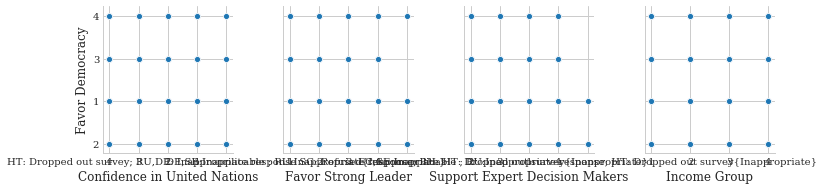

In [185]:
sns.pairplot(wv_gov, y_vars=['Favor Democracy'], x_vars=['Confidence in United Nations', 'Favor Strong Leader', 'Support Expert Decision Makers', 'Income Group'])

In [186]:
wv_gov.corr()

,Income Group
Income Group,1.0


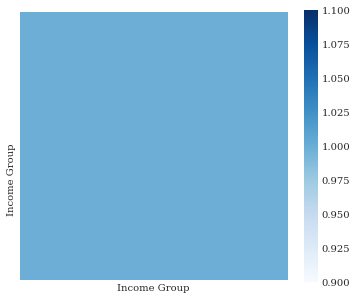

In [184]:
corrmat = wv_gov.corr()
sns.heatmap(corrmat, square = True, cmap="Blues")